In [44]:
import pandas as pd
csv_path = '/content/kaggle.csv'
df = pd.read_csv(csv_path, encoding = 'latin-1')
df.head(2464)

,ï»¿Lat,Lng,What Dinosaurs Eat,Accepted Name,Country,Cc,Diet,Early Interval,Formation,Geological Interval,Geological Time Period,Ref Author,Ref Pubyr,State,Max Ma,Min Ma
0,42.933300,123.966698,PLANT,Chaoyangsaurus youngi,China,CN,herbivore,Late Tithonian,Tuchengzi,Tithonian,Jurassic,Dong,1992,Liaoning,150.8,132.90
1,41.799999,120.733330,PLANT and ANIMAL,Protarchaeopteryx robusta,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji et al.,1998,Liaoning,130.0,122.46
2,41.799999,120.733330,PLANT and ANIMAL,Caudipteryx zoui,China,CN,omnivore,Late Barremian,Yixian,Barremian,Cretaceous,Ji and Ji,1997,Liaoning,130.0,122.46
3,50.740726,-111.528732,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Matthew and Brown,1922,Alberta,83.5,70.60
4,50.737015,-111.549347,FLESH,Gorgosaurus libratus,Canada,CA,carnivore,Late Campanian,Dinosaur Park,Campanian,Cretaceous,Russell,1970,Alberta,83.5,70.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458,49.183334,-98.099998,FISH,Hesperornis chowi,Canada,CA,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60
2459,49.183334,-98.099998,FISH,Hesperornis macdonaldi,Canada,CA,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60
2460,49.183334,-98.099998,FISH,Hesperornis macdonaldi,Canada,CA,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60
2461,49.183334,-98.099998,FISH,Hesperornis chowi,Canada,CA,piscivore,Early Campanian,Pierre Shale,Campanian,Cretaceous,Aotsuka and Sato,2016,Manitoba,83.5,70.60


In [45]:
# Calculate the number of missing values in each column
missing_values_per_column = df.isna().sum()

# Calculate the total number of missing values in the DataFrame
total_quantity_missing_values = df.isna().sum().sum()

# Print the number of missing values per column
print(missing_values_per_column)

# Print the total number of missing values
print("Total number of missing values:", total_quantity_missing_values)

ï»¿Lat                      0
Lng                         0
What Dinosaurs Eat          0
Accepted Name               0
Country                     0
Cc                          0
Diet                        0
Early Interval              0
Formation                 111
Geological Interval         0
Geological Time Period      0
Ref Author                  0
Ref Pubyr                   0
State                       0
Max Ma                      0
Min Ma                      0
dtype: int64
Total number of missing values: 111


In [46]:
# Calculate the mode of the column
moda = df['Formation'].mode()[0]

# Fill missing values with mode
df['Formation'].fillna(moda, inplace=True)

# Calculate the total number of missing values in the DataFrame
total_quantity_missing_values = df.isna().sum().sum()

# Print the total number of missing values
print("Total number of missing values:", total_quantity_missing_values)

Total number of missing values: 0


In [47]:
# Utiliza la función get_dummies de Pandas para realizar la codificación one-hot
df = pd.get_dummies(df, columns=['What Dinosaurs Eat'])
print(df.columns)

Index(['ï»¿Lat', 'Lng', 'Accepted Name', 'Country', 'Cc', 'Diet',
       'Early Interval', 'Formation', 'Geological Interval',
       'Geological Time Period', 'Ref Author', 'Ref Pubyr', 'State', 'Max Ma',
       'Min Ma', 'What Dinosaurs Eat_FISH', 'What Dinosaurs Eat_FLESH',
       'What Dinosaurs Eat_PLANT', 'What Dinosaurs Eat_PLANT and ANIMAL'],
      dtype='object')


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Separate features (X) and label (y)
X = df[['What Dinosaurs Eat_PLANT', 'What Dinosaurs Eat_FLESH','What Dinosaurs Eat_FISH','What Dinosaurs Eat_PLANT and ANIMAL']]
y = df['Diet']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Prediction example for a dinosaur
new_dinosaur = pd.DataFrame({'What Dinosaurs Eat_PLANT': [0], 'What Dinosaurs Eat_FLESH': [1],'What Dinosaurs Eat_FISH': [1],'What Dinosaurs Eat_PLANT and ANIMAL': [0]}, columns=X.columns)

# Make the prediction using the model
prediction = model.predict(new_dinosaur)

# The result of the prediction will be the category of the dinosaur
print(f'The dinosaur is classified as: {prediction[0]}')

Model Accuracy: 97.16%
The dinosaur is classified as: carnivore


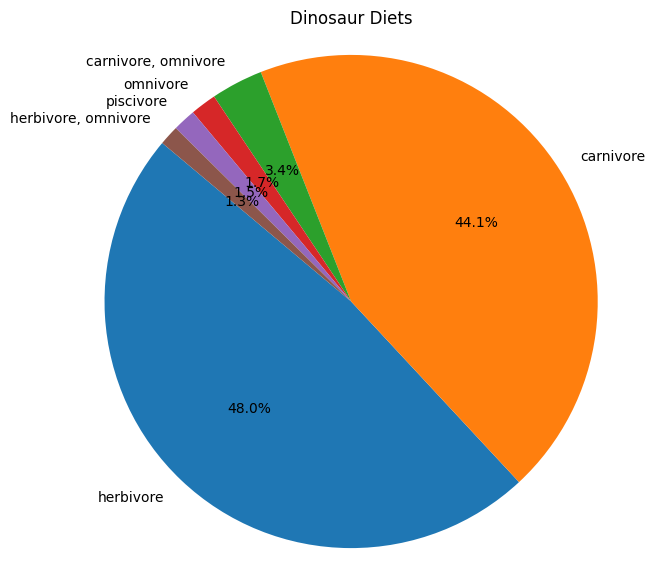

In [57]:
import matplotlib.pyplot as plt

# Count the frequency of each type of diet
dieta_counts = df['Diet'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(dieta_counts, labels=dieta_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Dinosaur Diets')
plt.axis('equal')
plt.show()
